##Os Codigos abaixo mostra mecanismos de Calbacks para salvar seu melhores modelos.

-sem calbacks, EarlyStopping e ModelCheckpoint


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configuração para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Gerar dados de exemplo (problema de classificação binária)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=(1000,))

# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para criar o modelo (mesma arquitetura para todos os experimentos)
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

##Modelo Baseline (sem callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


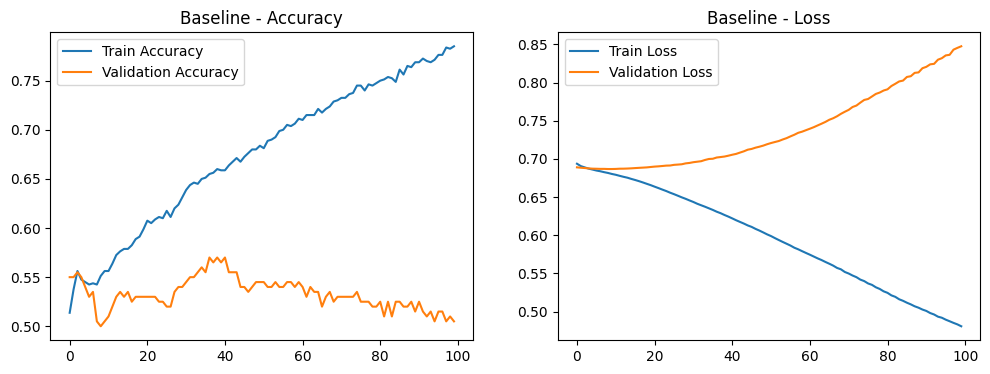

Baseline - Val Loss: 0.8476, Val Accuracy: 0.5050


In [2]:
# Criar e treinar o modelo baseline
model_baseline = create_model()

history_baseline = model_baseline.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)

# Plotar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'], label='Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title('Baseline - Loss')
plt.legend()
plt.show()

# Avaliar o modelo final
baseline_loss, baseline_acc = model_baseline.evaluate(X_val, y_val, verbose=0)
print(f"Baseline - Val Loss: {baseline_loss:.4f}, Val Accuracy: {baseline_acc:.4f}")

##Modelo com EarlyStopping


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


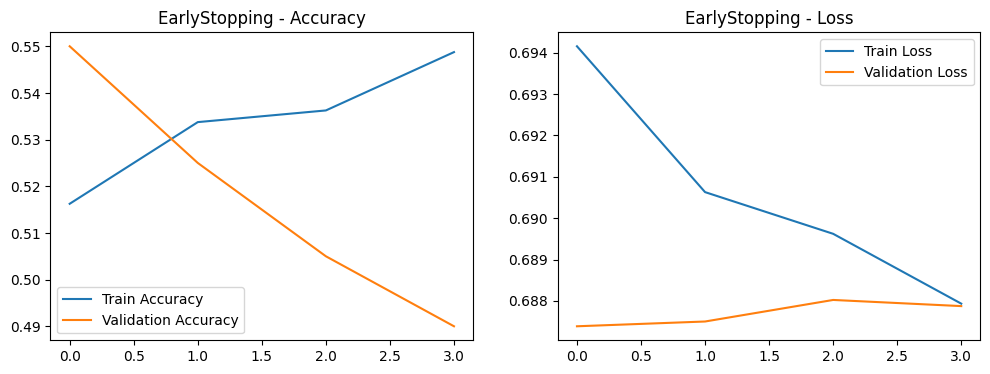

EarlyStopping - Val Loss: 0.6874, Val Accuracy: 0.5500
Treinamento parou na época: 4


In [5]:
# Criar e treinar o modelo com EarlyStopping
model_earlystop = create_model()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

history_earlystop = model_earlystop.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

# Plotar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_earlystop.history['accuracy'], label='Train Accuracy')
plt.plot(history_earlystop.history['val_accuracy'], label='Validation Accuracy')
plt.title('EarlyStopping - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_earlystop.history['loss'], label='Train Loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.title('EarlyStopping - Loss')
plt.legend()
plt.show()

# Avaliar o modelo final
earlystop_loss, earlystop_acc = model_earlystop.evaluate(X_val, y_val, verbose=0)
print(f"EarlyStopping - Val Loss: {earlystop_loss:.4f}, Val Accuracy: {earlystop_acc:.4f}")
print(f"Treinamento parou na época: {len(history_earlystop.history['loss'])}")

##Modelo com ModelCheckpoint

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from inf to 0.69413, saving model to best_model.h5



Epoch 2: val_loss improved from 0.69413 to 0.69256, saving model to best_model.h5



Epoch 3: val_loss improved from 0.69256 to 0.69185, saving model to best_model.h5



Epoch 4: val_loss improved from 0.69185 to 0.69126, saving model to best_model.h5



Epoch 5: val_loss improved from 0.69126 to 0.69063, saving model to best_model.h5



Epoch 6: val_loss improved from 0.69063 to 0.69021, saving model to best_model.h5



Epoch 7: val_loss improved from 0.69021 to 0.68969, saving model to best_model.h5



Epoch 8: val_loss improved from 0.68969 to 0.68908, saving model to best_model.h5



Epoch 9: val_loss improved from 0.68908 to 0.68890, saving model to best_model.h5



Epoch 10: val_loss improved from 0.68890 to 0.68855, saving model to best_model.h5



Epoch 11: val_loss improved from 0.68855 to 0.68837, saving model to best_model.h5



Epoch 12: val_loss improved from 0.68837 to 0.68808, saving model to best_model.h5



Epoch 13: val_loss improved from 0.68808 to 0.68769, saving model to best_model.h5



Epoch 14: val_loss did not improve from 0.68769

Epoch 15: val_loss improved from 0.68769 to 0.68756, saving model to best_model.h5



Epoch 16: val_loss improved from 0.68756 to 0.68684, saving model to best_model.h5



Epoch 17: val_loss improved from 0.68684 to 0.68683, saving model to best_model.h5



Epoch 18: val_loss improved from 0.68683 to 0.68670, saving model to best_model.h5



Epoch 19: val_loss improved from 0.68670 to 0.68657, saving model to best_model.h5



Epoch 20: val_loss improved from 0.68657 to 0.68631, saving model to best_model.h5



Epoch 21: val_loss did not improve from 0.68631

Epoch 22: val_loss did not improve from 0.68631

Epoch 23: val_loss improved from 0.68631 to 0.68625, saving model to best_model.h5



Epoch 24: val_loss improved from 0.68625 to 0.68602, saving model to best_model.h5



Epoch 25: val_loss did not improve from 0.68602

Epoch 26: val_loss did not improve from 0.68602

Epoch 27: val_loss did not improve from 0.68602

Epoch 28: val_loss improved from 0.68602 to 0.68582, saving model to best_model.h5



Epoch 29: val_loss improved from 0.68582 to 0.68533, saving model to best_model.h5



Epoch 30: val_loss did not improve from 0.68533

Epoch 31: val_loss did not improve from 0.68533

Epoch 32: val_loss improved from 0.68533 to 0.68508, saving model to best_model.h5



Epoch 33: val_loss did not improve from 0.68508

Epoch 34: val_loss did not improve from 0.68508

Epoch 35: val_loss did not improve from 0.68508

Epoch 36: val_loss did not improve from 0.68508

Epoch 37: val_loss did not improve from 0.68508

Epoch 38: val_loss did not improve from 0.68508

Epoch 39: val_loss did not improve from 0.68508

Epoch 40: val_loss did not improve from 0.68508

Epoch 41: val_loss did not improve from 0.68508

Epoch 42: val_loss did not improve from 0.68508

Epoch 43: val_loss did not improve from 0.68508

Epoch 44: val_loss did not improve from 0.68508

Epoch 45: val_loss did not improve from 0.68508

Epoch 46: val_loss did not improve from 0.68508

Epoch 47: val_loss did not improve from 0.68508

Epoch 48: val_loss did not improve from 0.68508

Epoch 49: val_loss did not improve from 0.68508

Epoch 50: val_loss did not improve from 0.68508

Epoch 51: val_loss did not improve from 0.68508

Epoch 52: val_loss did not improve from 0.68508

Epoch 53: val_loss 

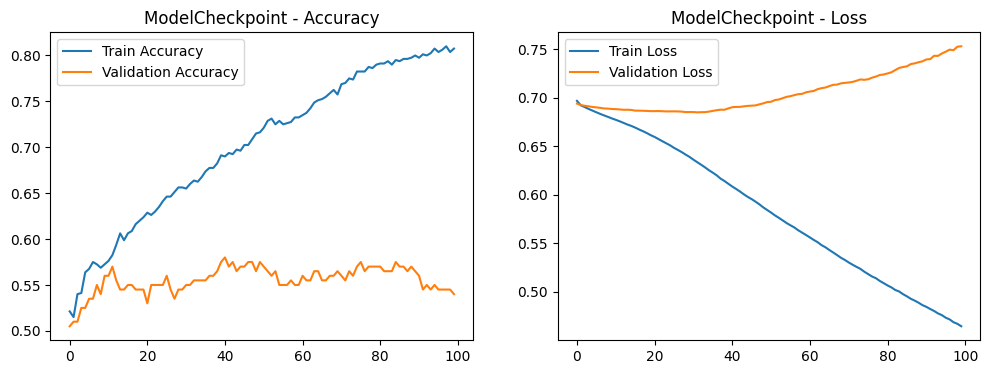

ModelCheckpoint - Val Loss: 0.6851, Val Accuracy: 0.5500


In [4]:
# Criar e treinar o modelo com ModelCheckpoint
model_checkpoint = create_model()

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history_checkpoint = model_checkpoint.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=0
)

# Plotar resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_checkpoint.history['accuracy'], label='Train Accuracy')
plt.plot(history_checkpoint.history['val_accuracy'], label='Validation Accuracy')
plt.title('ModelCheckpoint - Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_checkpoint.history['loss'], label='Train Loss')
plt.plot(history_checkpoint.history['val_loss'], label='Validation Loss')
plt.title('ModelCheckpoint - Loss')
plt.legend()
plt.show()

# Carregar o melhor modelo salvo e avaliar
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')
checkpoint_loss, checkpoint_acc = best_model.evaluate(X_val, y_val, verbose=0)
print(f"ModelCheckpoint - Val Loss: {checkpoint_loss:.4f}, Val Accuracy: {checkpoint_acc:.4f}")